<a href="https://colab.research.google.com/github/DrTihami/Loan-Tap-Business-Case/blob/main/LoanTap_Business_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/LoanTap.csv")

In [ ]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335868 non-null  float64
 1   term                  335868 non-null  object 
 2   int_rate              335868 non-null  float64
 3   installment           335868 non-null  float64
 4   grade                 335868 non-null  object 
 5   sub_grade             335868 non-null  object 
 6   emp_title             335868 non-null  object 
 7   emp_length            335868 non-null  object 
 8   home_ownership        335868 non-null  object 
 9   annual_inc            335868 non-null  float64
 10  verification_status   335868 non-null  object 
 11  issue_d               335868 non-null  object 
 12  loan_status           335868 non-null  object 
 13  purpose               335868 non-null  object 
 14  title                 335868 non-null  object 
 15  

In [ ]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df = df1.copy()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
X = df[['loan_amnt', 'int_rate', 'installment', 'dti', 'total_acc', 'revol_util']]

In [ ]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'dti', 'total_acc',
       'revol_util'],
      dtype='object')

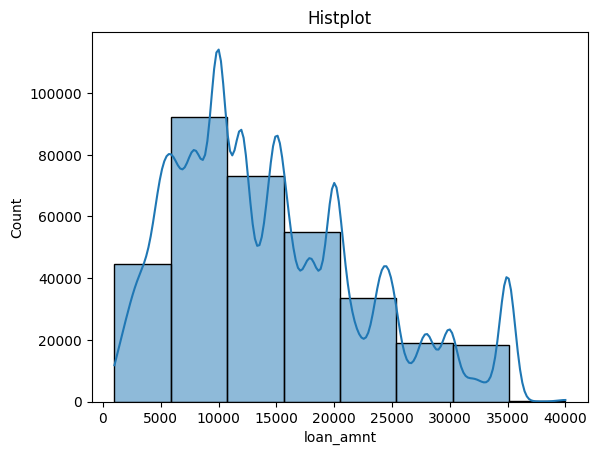

****************************************************************************************************


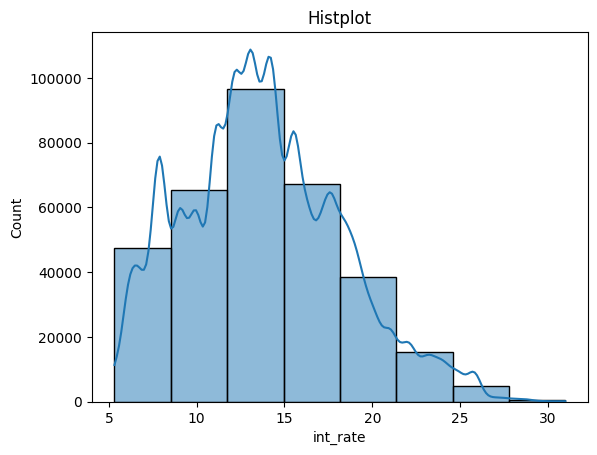

****************************************************************************************************


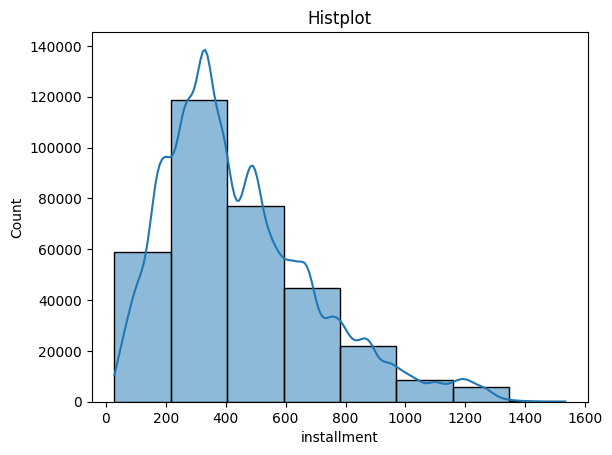

****************************************************************************************************


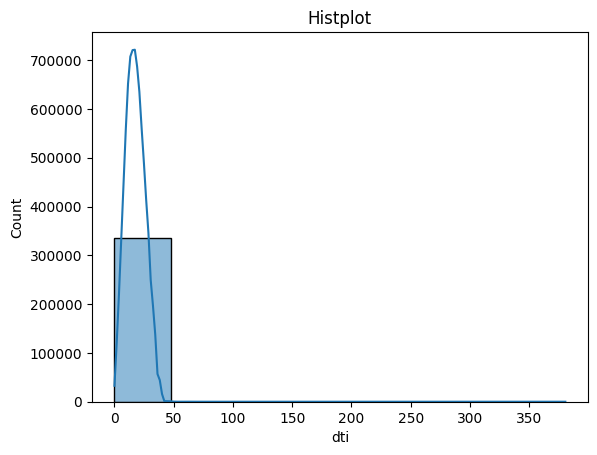

****************************************************************************************************


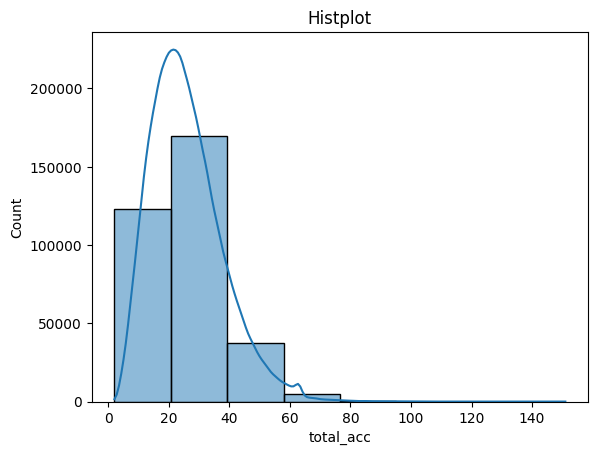

****************************************************************************************************


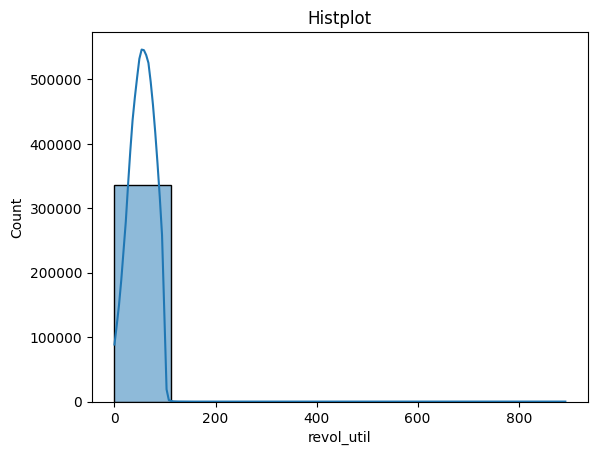

****************************************************************************************************


In [ ]:
def Histograms(X):
  cols = X.columns
  for column in cols:
    sns.histplot(X[column], bins= 8, kde=True)
    plt.title("Histplot")
    plt.show()
    print("*"*100)
Histograms(X)

<ipython-input-17-5e73d2f6e049>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde=False)


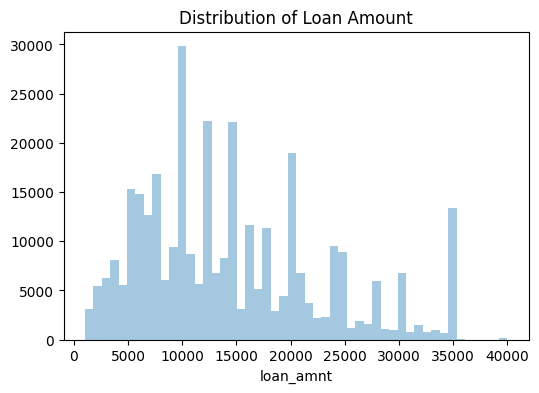

<ipython-input-17-5e73d2f6e049>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['revol_util'], kde=False)


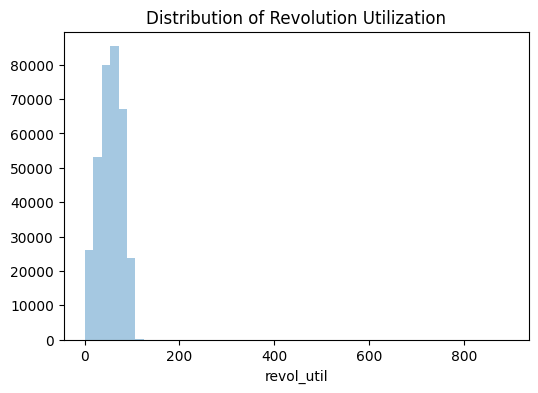

<ipython-input-17-5e73d2f6e049>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'], kde=False)


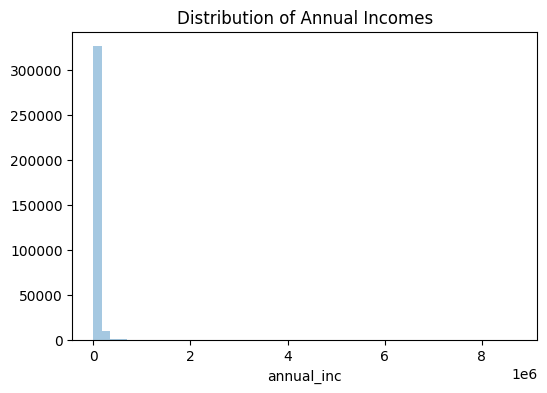

<ipython-input-17-5e73d2f6e049>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['int_rate'], kde=False)


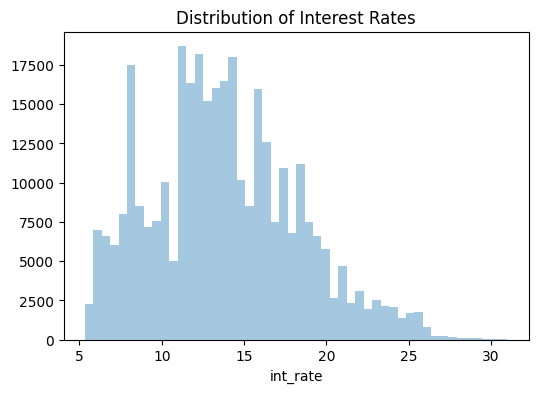

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.distplot(df['loan_amnt'], kde=False)
plt.title("Distribution of Loan Amount")
plt.show()

fig = plt.figure(figsize=(6, 4))
sns.distplot(df['revol_util'], kde=False)
plt.title("Distribution of Revolution Utilization")
plt.show()

fig = plt.figure(figsize=(6, 4))
sns.distplot(df['annual_inc'], kde=False)
plt.title("Distribution of Annual Incomes")
plt.show()

fig = plt.figure(figsize=(6, 4))
sns.distplot(df['int_rate'], kde=False)
plt.title("Distribution of Interest Rates")
plt.show()


In [ ]:
def Value_counts(col_name):
  for col_name in df.columns:
    print("col_name : " , col_name)
    df2=df[col_name].value_counts()
    print("Top 5 Value counts : ", pd.DataFrame(df2.head()))
    print()
    print("*"*50)
    print()
Value_counts(df)

col_name :  loan_amnt
Top 5 Value counts :           loan_amnt
10000.0      23213
12000.0      18207
15000.0      17226
20000.0      16572
35000.0      13190

**************************************************

col_name :  term
Top 5 Value counts :                term
 36 months  254776
 60 months   81092

**************************************************

col_name :  int_rate
Top 5 Value counts :         int_rate
10.99     10985
15.61      8788
12.99      8667
11.99      7540
8.90       6851

**************************************************

col_name :  installment
Top 5 Value counts :          installment
327.34          878
332.10          707
491.01          679
336.90          646
392.81          626

**************************************************

col_name :  grade
Top 5 Value counts :     grade
B  98008
C  92213
D  54640
A  51123
E  27123

**************************************************

col_name :  sub_grade
Top 5 Value counts :      sub_grade
B3      22329
B4      21

In [ ]:
def Unique_Values(col_name):
  for col_name in df.columns:
    print("col_name : " , col_name)
    print("No of Unique Values : " , df[col_name].nunique())
    print("*"*50)
Unique_Values(df)

col_name :  loan_amnt
No of Unique Values :  1388
**************************************************
col_name :  term
No of Unique Values :  2
**************************************************
col_name :  int_rate
No of Unique Values :  265
**************************************************
col_name :  installment
No of Unique Values :  48696
**************************************************
col_name :  grade
No of Unique Values :  7
**************************************************
col_name :  sub_grade
No of Unique Values :  35
**************************************************
col_name :  emp_title
No of Unique Values :  150833
**************************************************
col_name :  emp_length
No of Unique Values :  11
**************************************************
col_name :  home_ownership
No of Unique Values :  6
**************************************************
col_name :  annual_inc
No of Unique Values :  21339
**************************************************
c

In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.152340,0.954389,0.332247,0.025577,0.182940,-0.084162,0.326277,0.096734,0.210966,0.223526,-0.113071
int_rate,0.152340,1.000000,0.143927,-0.072658,0.165521,-0.000990,0.050886,-0.022230,0.272141,-0.045264,-0.080875,0.048942
installment,0.954389,0.143927,1.000000,0.325683,0.019783,0.170810,-0.076195,0.313485,0.119019,0.188001,0.193948,-0.106834
annual_inc,0.332247,-0.072658,0.325683,1.000000,-0.186110,0.125961,-0.010891,0.298210,0.024755,0.184841,0.238524,-0.048525
dti,0.025577,0.165521,0.019783,-0.186110,1.000000,0.293618,-0.054765,0.133558,0.181006,0.219550,-0.058003,-0.047313
open_acc,0.182940,-0.000990,0.170810,0.125961,0.293618,1.000000,-0.026063,0.213352,-0.144382,0.678333,0.107758,-0.034550
pub_rec,-0.084162,0.050886,-0.076195,-0.010891,-0.054765,-0.026063,1.000000,-0.105937,-0.087819,0.016103,0.013191,0.694376
revol_bal,0.326277,-0.022230,0.313485,0.298210,0.133558,0.213352,-0.105937,1.000000,0.223015,0.181975,0.199003,-0.129156
revol_util,0.096734,0.272141,0.119019,0.024755,0.181006,-0.144382,-0.087819,0.223015,1.000000,-0.112063,0.009465,-0.100703
total_acc,0.210966,-0.045264,0.188001,0.184841,0.219550,0.678333,0.016103,0.181975,-0.112063,1.000000,0.378633,0.039575


<ipython-input-21-6a6a9d9bb3e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


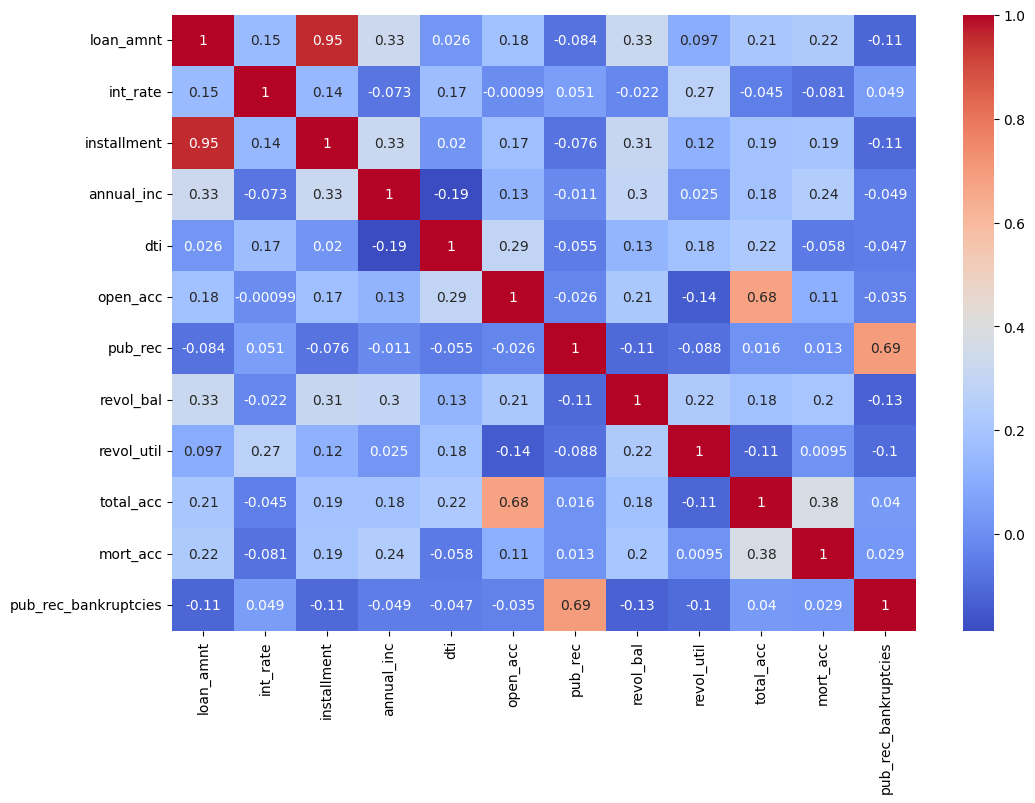

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,335868.000000,335868.000000,335868.000000,3.358680e+05,335868.000000,335868.000000,335868.000000,3.358680e+05,335868.000000,335868.000000,335868.000000,335868.000000
mean,14522.747627,13.795634,445.158837,7.581716e+04,17.719144,11.598324,0.184921,1.619306e+04,54.365450,25.858912,1.802699,0.125463
std,8386.593240,4.505201,251.588273,6.197219e+04,8.147837,5.181585,0.543618,2.099069e+04,23.962637,11.901536,2.139647,0.362258
min,1000.000000,5.320000,28.750000,5.000000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.640000,263.780000,4.700000e+04,11.630000,8.000000,0.000000,6.302000e+03,36.900000,17.000000,0.000000,0.000000
50%,12400.000000,13.350000,388.200000,6.500000e+04,17.250000,11.000000,0.000000,1.148000e+04,55.300000,24.000000,1.000000,0.000000
75%,20000.000000,16.780000,583.790000,9.000000e+04,23.420000,14.000000,0.000000,1.999025e+04,73.000000,33.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868,335868
unique,2,7,35,150833,11,6,3,58,2,14,32187,661,2,3,334143
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Aug-2001,f,INDIVIDUAL,USNS Johnson\r\nFPO AE 05113
freq,254776,98008,22329,4367,115200,170832,115687,14133,269556,204310,144270,2569,187555,335312,7


In [ ]:
ordinal_variables = df[['grade',	'sub_grade',	'emp_length',	'issue_d']]

nominal_variables = df[['term',	'emp_title',	'emp_length',	'home_ownership',	'verification_status',
                       'purpose',	'title',  'earliest_cr_line',	'initial_list_status',	'application_type']]

In [ ]:
df_categorical_columns = df[['term',	'grade',	'sub_grade',	'emp_title',	'emp_length',	'home_ownership',	'verification_status',	'issue_d',	'purpose',	'title',	'earliest_cr_line',	'initial_list_status',	'application_type']]

In [ ]:
for i in df_categorical_columns:
  print("Value Counts of i : ",  df_categorical_columns[i].value_counts())
  print("*"*50)

Value Counts of i :   36 months    254776
 60 months     81092
Name: term, dtype: int64
**************************************************
Value Counts of i :  B    98008
C    92213
D    54640
A    51123
E    27123
F    10168
G     2593
Name: grade, dtype: int64
**************************************************
Value Counts of i :  B3    22329
B4    21820
C1    20273
C2    19369
B2    19238
C3    18578
B5    18315
C4    17950
B1    16306
C5    16043
A5    15053
D1    14097
A4    12203
D2    11866
D3    10320
D4    10074
D5     8283
A3     8261
A1     8037
A2     7569
E1     6762
E2     6438
E3     5341
E4     4642
E5     3940
F1     3022
F2     2369
F3     2007
F4     1545
F5     1225
G1      898
G2      646
G3      477
G4      308
G5      264
Name: sub_grade, dtype: int64
**************************************************
Value Counts of i :  Teacher                 4367
Manager                 4231
Registered Nurse        1841
RN                      1840
Supervisor              181

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df_category = df.select_dtypes(np.object)
df_numeric = df.select_dtypes(np.number)

<ipython-input-15-ca5d6e9d6ef4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_category = df.select_dtypes(np.object)


In [ ]:
df_numeric.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [ ]:
df_category.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# Coverting Term column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['term_encoded'] = label_encoder.fit_transform(df['term'])

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['grade'], prefix='grade')

In [ ]:
# Frequency Encoding
frequency_encoding = df['emp_title'].value_counts(normalize=True)
df['emp_title_frequency'] = df['emp_title'].map(frequency_encoding)

In [ ]:
# Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your dataset
# Perform data preprocessing and encoding as needed

# Drop unnecessary columns (e.g., 'address') and set the target variable ('loan_status')
df = df.drop(['address'], axis=1)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# Sample a fraction of the dataset
sampled_df = df.sample(frac=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Incremental one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=True)

X_encoded = pd.DataFrame()

for chunk in np.array_split(X, 10):  # Split data into 10 chunks
    encoded_chunk = pd.DataFrame(encoder.fit_transform(chunk).toarray())
    X_encoded = pd.concat([X_encoded, encoded_chunk], axis=0, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cols = list(df_cat.columns)

def cat_to_num(cols):
  for col in cols:
    df_cat[col] = pd.get_dummies(df_cat[col], drop_first=True)
cat_to_num(cols)

In [ ]:
chunk_size = 10000
chunks = [X.iloc[i:i + chunk_size, :] for i in range(0, len(X), chunk_size)]

# Process and concatenate chunks
X_encoded = pd.concat([pd.get_dummies(chunk, drop_first=True) for chunk in chunks], axis=0)

In [ ]:
# List of categorical columns to one-hot encode
categorical_columns = ['term', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',
                       'purpose',	'title',  'earliest_cr_line',	'initial_list_status',	'application_type']

# Perform one-hot encoding only on the selected categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler

# Create a scaler and fit it to the training data, then transform both training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

In [ ]:
# Evaluation of Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Parameter tuning the regularization strength
logreg_model_tuned = LogisticRegression(C=0.1, random_state=42)
logreg_model_tuned.fit(X_train_scaled, y_train)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your dataset
# Perform data preprocessing and encoding as needed

# Drop unnecessary columns (e.g., 'address') and set the target variable ('loan_status')
df = df.drop(['address'], axis=1)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize/Normalize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Binary Encoding
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['emp_title'])
df_binary = binary_encoder.fit_transform(df['emp_title'])
df = pd.concat([df, df_binary], axis=1)

In [ ]:
# Ordinal Encoding
sub_grade_order = {'A1': 1, 'A2': 2, ..., 'G5': 35}
df['sub_grade_encoded'] = df['sub_grade'].map(sub_grade_order)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_category[col] = pd.get_dummies(df_category[col], drop_first=True)

In [ ]:
df_category.info()

In [ ]:
cols = list(df_category.columns)
def cat_2_num(cols):
  for col in cols:
    df_category[col] = pd.get_dummies(df_category[col], drop_first=True)
cat_2_num(cols)

In [ ]:
df_category.dtypes

In [ ]:
df_final = pd.concat([df_category, df_numeric])

In [ ]:
#df = df.drop(["address"])

Target_variable = df['earliest_cr_line']


ordinal_variables = df[['grade',	'sub_grade',	'emp_length']]

nominal_variables = df[['term',	'emp_title',	'emp_length',	'home_ownership',	'verification_status',	'issue_d',
                       'loan_status',	'purpose',	'title',  'earliest_cr_line',	'initial_list_status',	'application_type']]

numerical_variables = df[['loan_amnt',	'int_rate',	'installment',	'annual_inc',	'dti',	'open_acc',	'pub_rec',	'revol_bal',	'revol_util',	'total_acc',	'mort_acc',	'pub_rec_bankruptcies']]

In [ ]:
y= df['earliest_cr_line']
X = df.drop['earliest_cr_line']

# Splitting the dat aset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Transforming the nominal categorical variables/featues by process of OHE technique
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
OHE_train = OHE.fit_transform(X_train[['grade','sub_grade','emp_length']], remainder ='passthrough')
OHE_test = OHE.transform(sparse=False, drop='first', X_text[['grade','sub_grade','emp_length']], remainder ='passthrough')

# Transforming the ordinal categorical variables/featues by process of Ordinal Encoding technique
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
OE_train = OE.fit_transform(X_train[['term','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','title','initial_list_status','application_type']] , remainder ='passthrough')
OE_test = OE.transform(X_text[['term','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','title','initial_list_status','application_type']] , remainder ='passthrough')

# Transforming the Target Variable by process of Label Encoding technique
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
LB_train = LB.transform(y_train)
LB_test = LB.transform(y_test)


In [ ]:
# Mapping function
df['grade'] = df.grade.map({'B':2,  'A':1, 'C':3, 'E':5, 'D':4, 'F':6, 'G':7})
df.tail()

In [ ]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers = [], remainder ='passthrough')

from sklearn.pipeline import Pipeline, make_pipeline
pipe = make_pipeline(transformer1, transformer2, transformer3, transformer4)

pipe.fit_transform

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluation of Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))